In [1]:
import csv, os
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import seaborn as sns

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_306528e23875435aabc26e9ad6be5db9 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='F4v5so2pqT9aXhqLJVu2MOtfqLHawhjSF41BZpMeWPUg',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_306528e23875435aabc26e9ad6be5db9.get_object(Bucket='courseracapstoneweek4-donotdelete-pr-2lhvaita3wtedb',Key='Admission_Predict.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()



,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [2]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [3]:
df.count()

Serial No.           400
GRE Score            400
TOEFL Score          400
University Rating    400
SOP                  400
LOR                  400
CGPA                 400
Research             400
Chance of Admit      400
dtype: int64

Drop Serial Number, Statement of Purpose, and Letter of Recomendation because they do not attain to our purpose

In [4]:
cdf = df.drop(["Serial No."], axis=1)
cdf = df.drop(["SOP"], axis=1)
cdf = df.drop(["LOR "], axis=1)
#df.drop(['Serial No.'], axis=1)

In [ ]:
df.head()

In [6]:
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
%matplotlib inline

Visual Representation of the data described

In [21]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


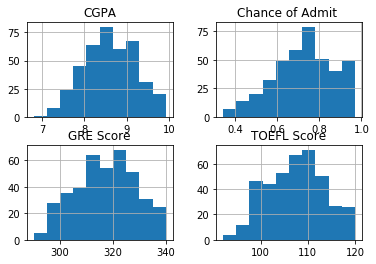

In [8]:
graph1 = df[["GRE Score", "TOEFL Score", "CGPA", "Chance of Admit "]]
graph1.hist()
plt.show()

In [23]:
graph1.corr()

,GRE Score,TOEFL Score,CGPA,Chance of Admit
GRE Score,1.000000,0.835977,0.833060,0.802610
TOEFL Score,0.835977,1.000000,0.828417,0.791594
CGPA,0.833060,0.828417,1.000000,0.873289
Chance of Admit,0.802610,0.791594,0.873289,1.000000


Graphs below show correlation between chance of admittance with other variables

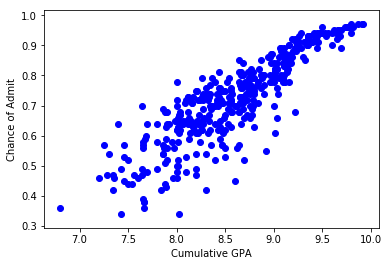

In [9]:
plt.scatter(df.CGPA, df["Chance of Admit "],  color='blue')
plt.xlabel("Cumulative GPA")
plt.ylabel("Chance of Admit")
plt.show()

(0, 1.0869474309730853)

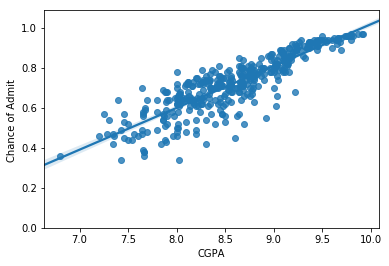

In [10]:
sns.regplot(x= "CGPA", y="Chance of Admit ", data=df)
plt.ylim(0,)

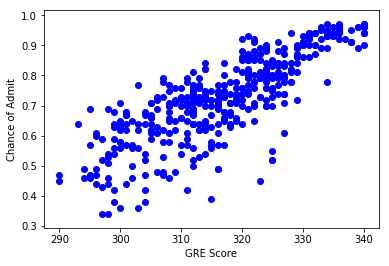

In [11]:
plt.scatter(df["GRE Score"], df["Chance of Admit "],  color='blue')
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
plt.show()

(0, 1.0339292265522804)

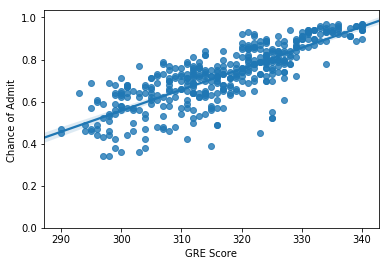

In [12]:
sns.regplot(x= "GRE Score", y="Chance of Admit ", data=df)
plt.ylim(0,)

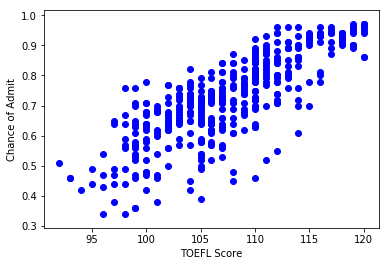

In [13]:
plt.scatter(df["TOEFL Score"], df["Chance of Admit "],  color='blue')
plt.xlabel("TOEFL Score")
plt.ylabel("Chance of Admit")
plt.show()

(0, 1.0385144581078469)

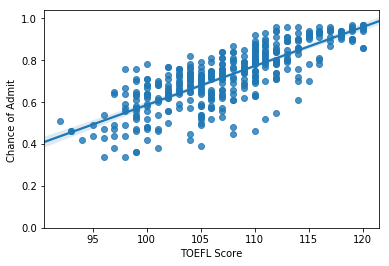

In [14]:
sns.regplot(x= "TOEFL Score", y="Chance of Admit ", data=df)
plt.ylim(0,)

In [15]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['CGPA'], df['Chance of Admit '])
print("The Pearson Correlation Coefficient between {} and chance of admittance is {} with P = {}".format("cumulative GPA", pearson_coef, p_value))  
pearson_coef, p_value = stats.pearsonr(df['GRE Score'], df['Chance of Admit '])
print("The Pearson Correlation Coefficient between {} and chance of admittance is {} with P = {}".format("GRE score", pearson_coef, p_value))  
pearson_coef, p_value = stats.pearsonr(df['TOEFL Score'], df['Chance of Admit '])
print("The Pearson Correlation Coefficient between {} and chance of admittance is {} with P = {}".format("TOEFL score", pearson_coef, p_value))  

The Pearson Correlation Coefficient between cumulative GPA and chance of admittance is 0.8732890993553003 with P = 2.336514000498104e-126
The Pearson Correlation Coefficient between GRE score and chance of admittance is 0.8026104595903505 with P = 2.458112414179346e-91
The Pearson Correlation Coefficient between TOEFL score and chance of admittance is 0.7915939869351047 with P = 3.6341021759974733e-87


<h3>Data Training </h3>

In [16]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

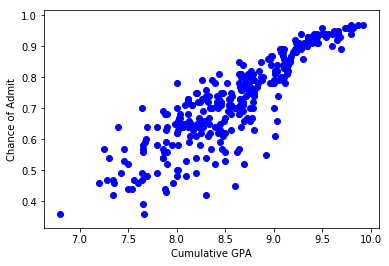

In [17]:
plt.scatter(train.CGPA, train["Chance of Admit "],  color='blue')
plt.xlabel("Cumulative GPA")
plt.ylabel("Chance of Admit")
plt.show()

<h3>Modeling</h3>

Coefficients:  [[ 0.20371613]]
Intercept:  [-1.02542191]
Mean absolute error: 0.06
Residual sum of squares (MSE): 0.01
R2-score: 0.54


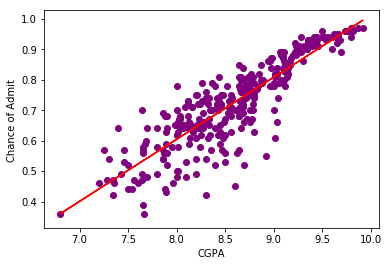

In [18]:
from sklearn import linear_model
regr = linear_model.LinearRegression()


train_x = np.asanyarray(train[['CGPA']])
train_y = np.asanyarray(train[['Chance of Admit ']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)


from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['CGPA']])
test_y = np.asanyarray(test[['Chance of Admit ']])
test_y_hat = regr.predict(test_x)
plt.scatter(train["CGPA"], train["Chance of Admit "],  color='purple')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("CGPA")
plt.ylabel("Chance of Admit ")

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Coefficients:  [[ 0.00969772]]
Intercept:  [-2.34593557]
Mean absolute error: 0.07
Residual sum of squares (MSE): 0.01
R2-score: 0.36


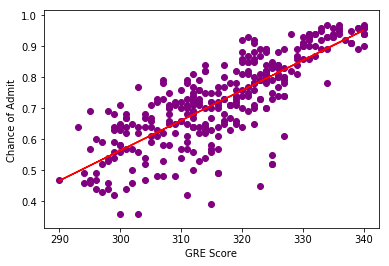

In [19]:
from sklearn import linear_model
regr = linear_model.LinearRegression()


train_x = np.asanyarray(train[['GRE Score']])
train_y = np.asanyarray(train[['Chance of Admit ']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)


from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['GRE Score']])
test_y = np.asanyarray(test[['Chance of Admit ']])
test_y_hat = regr.predict(test_x)
plt.scatter(train["GRE Score"], train["Chance of Admit "],  color='purple')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit ")

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Coefficients:  [[ 0.01858974]]
Intercept:  [-1.26971426]
Mean absolute error: 0.07
Residual sum of squares (MSE): 0.01
R2-score: 0.32


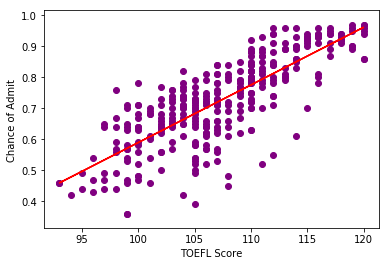

In [20]:
from sklearn import linear_model
regr = linear_model.LinearRegression()


train_x = np.asanyarray(train[['TOEFL Score']])
train_y = np.asanyarray(train[['Chance of Admit ']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)


from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['TOEFL Score']])
test_y = np.asanyarray(test[['Chance of Admit ']])
test_y_hat = regr.predict(test_x)
plt.scatter(train["TOEFL Score"], train["Chance of Admit "],  color='purple')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("TOEFL Score")
plt.ylabel("Chance of Admit ")

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )